# <span style='color:rgb(102, 51, 0)'> Projet d'économétrie SIM215  </span>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import statsmodels.api as sm
from scipy import stats
from scipy.stats import t
from scipy.stats import f
import math

La base de données correspond à une enquête menée auprès de femmes dans le but d'étudier leur participation au travail (main d'oeuvre).
https://www.rdocumentation.org/packages/car/versions/2.1-6/topics/Mroz

# <span style='color:rgb(102, 51, 0)'> Partie 1. Régression  </span>

## <span style='color:rgb(102, 51, 0)'> 1. Lire le fichier mroz.txt. Ne sélectionner que les observations pour lesquelles la variable wage est strictement positive  </span>

In [4]:
data = pd.read_csv("/home/ongono/Documents/econometrie/textfiles/MROZ.raw", delim_whitespace = True,header = None)
data = data.rename(columns={0: 'inlf',
                            1: 'hours',                    
                            2: 'kidslt6',                  
                            3: 'kidsge6',                  
                            4: 'age',                      
                            5: 'educ',                     
                            6: 'wage',                     
                            7: 'repwage',                  
                            8: 'hushrs',                   
                            9: 'husage',                   
                            10: 'huseduc',                  
                            11: 'huswage',                 
                            12: 'faminc',                   
                            13: 'mtr',                      
                            14: 'motheduc',
                            15: 'fatheduc',
                            16: 'unem',
                            17: 'city', 
                            18: 'exper',
                            19: 'nwifeinc',
                            20: 'lwage',
                            21: 'expersq'
                           })
data

,inlf,hours,kidslt6,kidsge6,age,educ,wage,repwage,hushrs,husage,...,faminc,mtr,motheduc,fatheduc,unem,city,exper,nwifeinc,lwage,expersq
0,1,1610,1,0,32,12,3.354,2.65,2708,34,...,16310,0.7215,12,7,5.0,0,14,10.910060,1.210154,196
1,1,1656,0,2,30,12,1.3889,2.65,2310,30,...,21800,0.6615,7,7,11.0,1,5,19.499980,.3285121,25
2,1,1980,1,3,35,12,4.5455,4.04,3072,40,...,21040,0.6915,12,7,5.0,0,15,12.039910,1.514138,225
3,1,456,0,3,34,12,1.0965,3.25,1920,53,...,7300,0.7815,7,7,5.0,0,6,6.799996,.0921233,36
4,1,1568,1,2,31,14,4.5918,3.60,2000,32,...,27300,0.6215,12,14,9.5,1,7,20.100060,1.524272,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
748,0,0,0,2,40,13,.,0.00,3020,43,...,28200,0.6215,10,10,9.5,1,5,28.200000,.,25
749,0,0,2,3,31,12,.,0.00,2056,33,...,10000,0.7715,12,12,7.5,0,14,10.000000,.,196
750,0,0,0,0,43,12,.,0.00,2383,43,...,9952,0.7515,10,3,7.5,0,4,9.952000,.,16
751,0,0,0,0,60,12,.,0.00,1705,55,...,24984,0.6215,12,12,14.0,1,15,24.984000,.,225


### Data description

### Selection des variables pour lesquelles le salaire est strictement positif

In [5]:
# Pour faire la selection, on remplace les valeurs manquantes par 0
cols = ['wage', 'lwage']
for i in cols:
    data[i] = [0. if va=='.' else float(va) for va in data[i]]

In [6]:
# on sélectionne les observations pour lesquelles la variable wage est strictement positive.
data_wage_positif = data[data.wage > 0.0]
data1 = data_wage_positif.reset_index()
data1

,index,inlf,hours,kidslt6,kidsge6,age,educ,wage,repwage,hushrs,...,faminc,mtr,motheduc,fatheduc,unem,city,exper,nwifeinc,lwage,expersq
0,0,1,1610,1,0,32,12,3.3540,2.65,2708,...,16310,0.7215,12,7,5.0,0,14,10.910060,1.210154,196
1,1,1,1656,0,2,30,12,1.3889,2.65,2310,...,21800,0.6615,7,7,11.0,1,5,19.499980,0.328512,25
2,2,1,1980,1,3,35,12,4.5455,4.04,3072,...,21040,0.6915,12,7,5.0,0,15,12.039910,1.514138,225
3,3,1,456,0,3,34,12,1.0965,3.25,1920,...,7300,0.7815,7,7,5.0,0,6,6.799996,0.092123,36
4,4,1,1568,1,2,31,14,4.5918,3.60,2000,...,27300,0.6215,12,14,9.5,1,7,20.100060,1.524272,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,423,1,680,0,5,36,10,2.3118,0.00,3430,...,19772,0.7215,7,7,7.5,0,2,18.199980,0.838027,4
424,424,1,2450,0,1,40,12,5.3061,6.50,2008,...,35641,0.6215,7,7,5.0,1,21,22.641060,1.668857,441
425,425,1,2144,0,2,43,13,5.8675,0.00,2140,...,34220,0.5815,7,7,7.5,1,22,21.640080,1.769429,484
426,426,1,1760,0,1,33,12,3.4091,3.21,3380,...,30000,0.5815,12,16,11.0,1,14,23.999980,1.226448,196


    On constate qu'on perd environ 325 données. Donc, nous avions dans la base de données 325 valeurs manquantes.

## <span style='color:rgb(102, 51, 0)'> 2. Faire les statistiques descriptives du salaire, de l’age et de l’éducation pour l’ensemble des femmes puis, pour les femmes dont le salaire du mari est supérieure au 65 ème percentile de l’échantillon, puis pour les femmes dont le salaire du mari est inférieur au 65 ème percentile de l’échantillon. Commenter  </span>

### Statistiques descriptives du salaire, de l’age et de l’éducation pour l’ensemble des femmes 

In [7]:
data1[['wage','age','educ']].describe()

,wage,age,educ
count,428.000000,428.000000,428.000000
mean,4.177682,41.971963,12.658879
std,3.310282,7.721084,2.285376
min,0.128200,30.000000,5.000000
25%,2.262600,35.000000,12.000000
50%,3.481900,42.000000,12.000000
75%,4.970750,47.250000,14.000000
max,25.000000,60.000000,17.000000


Le salaire moyen des femmes est de 4.17$ par heure. Celles-ci ont en moyenne 42 ans environ et ont un niveau d'éducation compris entre 12 et 13

### Femmes dont le salaire du mari est supérieur au 65ème percentile de l’échantillon

In [8]:
per65 = data1.huswage.quantile(0.65)                        # 65ème percentile du salaire du mari
data_high_per65 = data1[data1.wage > per65]                 # observations pour lesquelles wage > per65
data_high_per65[['wage','age','educ']].describe()           # stats descriptives de 'wage','age','educ'

,wage,age,educ
count,41.000000,41.000000,41.000000
mean,11.713202,41.878049,14.780488
std,5.128846,8.237703,2.403250
min,7.843100,30.000000,10.000000
25%,8.333300,35.000000,12.000000
50%,9.578500,40.000000,16.000000
75%,11.933000,48.000000,17.000000
max,25.000000,57.000000,17.000000


Le salaire moyen des femmes est de 11.71$ par heure. Celles-ci ont en moyenne 42 ans environ et ont un niveau d'éducation compris entre 14 et 15.

### Femmes dont le salaire du mari est inférieur au 65ème percentile de l’échantillon

In [9]:
data_inf_per65 = data1[data1.wage < per65]                 # observations pour lesquelles wage < per65
data_inf_per65[['wage','age','educ']].describe()           # stats descriptives de 'wage','age','educ'

,wage,age,educ
count,387.000000,387.000000,387.000000
mean,3.379345,41.981912,12.434109
std,1.650916,7.675557,2.156488
min,0.128200,30.000000,5.000000
25%,2.135300,35.000000,12.000000
50%,3.214300,42.000000,12.000000
75%,4.482800,47.000000,13.000000
max,7.652200,60.000000,17.000000


Le salaire moyen des femmes est de 3.38$ par heure. Celles-ci ont en moyenne 42 ans environ et ont un niveau d'éducation compris entre 12 et 13.

### Commentaire:

Il existe une minorité de femmes (effectif = 41) dont le salaire horaire est important. Il s'agit des femmes dont le salaire du mari est supérieur au 65ème percentile du salaire des maris de l'échantillon. Celles-ci ont un niveau d'étude élevé compris entre 14 et 15 et sont agées de 42 ans en moyenne. Le plus bas salaire dans ce sous groupe de femmes est de 7.84 et le plus élevé est de 25. Cependant l'ecart type des salaires dans ce sous groupe reste important ce qui reflecte une grande disparité autour de la moyenne des salaires de ce sous groupe.

L'autre sous groupe est majoritaire dans l'échantillon (effectif = 387). Il influence les statistiques globales de l'échantillon. Les femmes ont un salaire moyen de 3.37, elles sont agées de 42 ans, et ont un niveau d'éducation compris entre 12 et 13.


## <span style='color:rgb(102, 51, 0)'> 3- Faire l'histogramme de la variable wage. Supprimer les observations qui sont à plus de 3 écart-types de la moyenne et refaire l’histogramme </span>

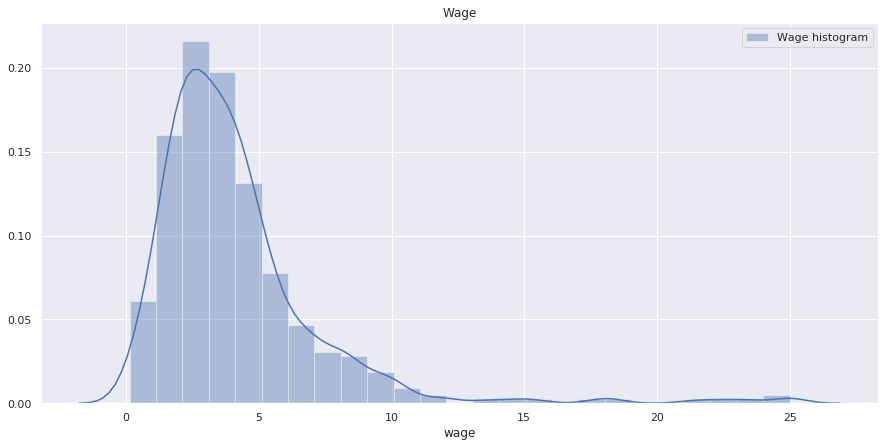

In [10]:
plt.figure(figsize=(15,7))
plt.title("Wage")
sns.distplot(data1.wage, bins=25, label='Wage histogram')
plt.legend()
plt.show()

In [11]:
stats.skew(data1.wage)

3.0801391789818724

### Calcul de l'écart-type et de l'écart à la moyenne

In [12]:
ecart_type = data1[['wage']].std()[0]
ecart_a_moy = data1[['wage']] - data1[['wage']].mean()

### Selection des données pour lesquelles l'écart à la moyenne est inférieure à 3 ecart-types

In [13]:
df = ecart_a_moy[ecart_a_moy.wage <= 3*ecart_type]

### Histogramme des données selectionnées

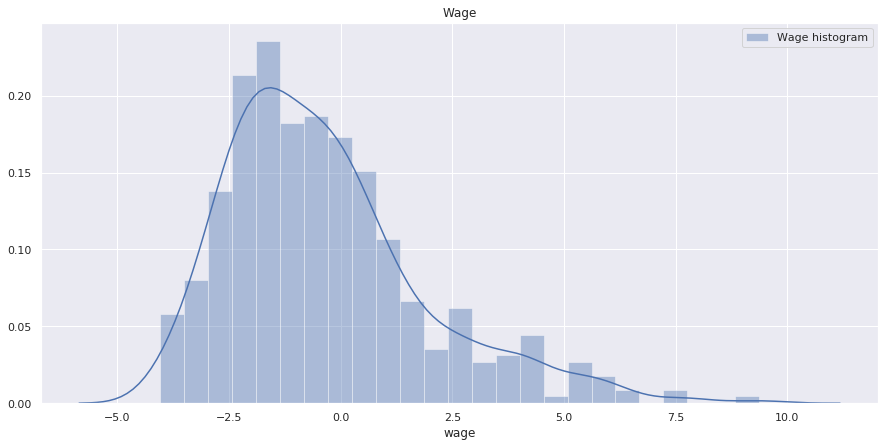

In [14]:
plt.figure(figsize=(15,7))
plt.title("Wage")
sns.distplot(df.wage, bins=25, label='Wage histogram')
plt.legend()
plt.show()

In [15]:
stats.skew(df.wage)

1.13137305456983

### Commentaire:
On peut constater qu'en éliminant les observations qui sont éloignées de trois écart-types à la moyenne on obtient un distribution qui se rapproche mieux de la distribution de la loi normale. Le coefficient d'asymétrie skewness  calculé permet dans les deux cas de figure permet d'infirmer cette hypothèse.


## <span style='color:rgb(102, 51, 0)'> 4. Calculer les corrélations motheduc et fatheduc. Expliquer le problème de multi-collinéarité. Commenter </span>

In [16]:
data1.motheduc.corr(data1.fatheduc, method='pearson')

0.554063218431168

### Représentation graphique des deux variables

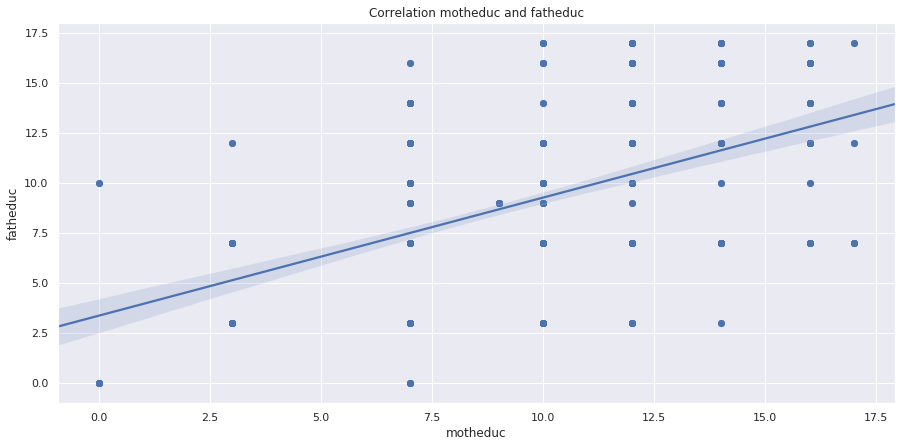

In [17]:
plt.figure(figsize=(15,7))
plt.scatter(data1.motheduc, data1.fatheduc)
sns.regplot(data1.motheduc, data1.fatheduc, scatter=True)
plt.title('Correlation motheduc and fatheduc')
plt.xlabel('motheduc')
plt.ylabel('fatheduc')
plt.show()

### Explication du problème de multi-collinéarité. Commentaire

La multicolinéarité survient lorsque plusieurs variables explicatives du modèle sont fortement colinéaires de sorte que leurs effets sur la variable expliquée pourrait quasiment être identique. En présence de multicolinéarité forte, les conséquences se ressentent sur l'inférence statistique c'est à dire sur la significativité des coefficients estimés. De part le fait que la multicolinéarité forte implique des variances de coefficients estimés élevés, et que celles ci sont utilisés pour effectuer les tests de student de significativité des coefficients, on pourrait en cas de colinéarité forte obtenir des coefficients non sginificatifs alors que ceux le sont bien où vis-versa.

Pour ce qui est des variables motheduc et fatheduc leur coefficient de correlation s'établit à 0.55. La correlation forte est atteinte lorsque le coefficient de corrélation tend vers -1 ou 1. Dans ce cas de figure il y a bien correlation entre les deux variables motheduc et fatheduc. Mais cette correlation ne peut etre considérée comme une corrélation forte.

## <span style='color:rgb(102, 51, 0)'> 5. Faites un graphique en nuage de point entre wage et educ. S'agit-il d'un effet "toute chose étant égale par ailleurs" ? </span>

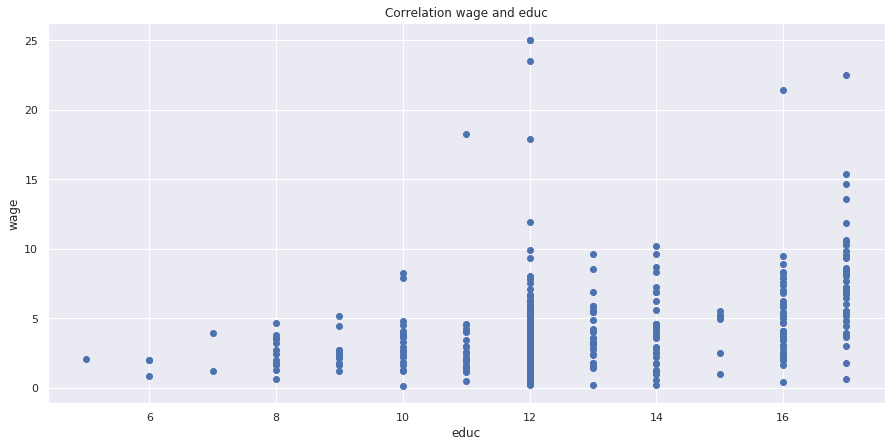

In [18]:
plt.figure(figsize=(15,7))
plt.scatter(data1.educ, data1.wage)
#sns.regplot(data1.educ, data1.wage, scatter=True)
plt.title('Correlation wage and educ')
plt.xlabel('educ')
plt.ylabel('wage')
plt.show()

### Commentaire:
Non. Il ne s'agit pas d'un effet "toute chose étant égale par ailleurs". En effet, Nous n'avons qu'un nuage de points qui nous donne une idée sur la corrélation entre les deux variables sans pour autant nous permettre d'identifier un effet causal "toute chose étant égale par ailleurs". 

## <span style='color:rgb(102, 51, 0)'>  6 - Quelle est l'hypothèse fondamentale qui garantit des estimateurs non biaisés ? Expliquer le biais de variable omise. </span>

L'hypothèse fondementale qui garantit des estimateurs non biaisés est l'hypothèse d'absence de correlation entre les variables explicatives et le terme d'erreur.

Le biais de variable omise intervient lorsqu'une variable potentiellement explicative du phénomène est omise dans l'équation de regression. Etant donné que le terme d'erreur englobe toutes les autres variables explicatives non observées, celui ci inclut la variable omise. S'il existe une corrélation entre la variable omise et certaines variables explicatives, vu que la variable omise agit directement sur la variable expliquée, alors il y a bien corrélation entre le terme d'erreur et les explicatives et ceci est source d'endogénéité.

Illustration:

Equation de départ:

$\Large y_{i} = \alpha + \beta x_{i} + \gamma z_{i} + \epsilon_{i}$ 

Equation estimée:        

$\Large y_{i} = \alpha + \beta x_{i} + \epsilon_{i}$  avec $\Large(\epsilon_{i} = \gamma z_{i} + u_{i})$

$\Large z_{i}$ étant la variable omise dans l'équation estimée, il agit directement sur $\Large y_{i}$. Si $\Large z_{i}$ et $\Large x_{i}$ sont correlées, alors il y a bien correlation entre $\Large x_{i}$ et $\Large \epsilon_{i}$ de l'équation estimée. Le coefficient $ \Large \beta$ estimé est donc un coefficient biaisé.

## <span style='color:rgb(102, 51, 0)'>  7 - Faire la régression du log de wage en utilisant comme variables explicatives une constante, city, educ, exper, nwifeinc, kidslt6, kidsgt6. Commentez l'histogramme des résidus. </span>

In [19]:
cols = ['city', 'educ', 'exper', 'nwifeinc', 'kidslt6', 'kidsge6']
X = data1[cols]
Y = data1.lwage
model = sm.OLS(Y, sm.add_constant(X)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  lwage   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     12.92
Date:                Sun, 12 Apr 2020   Prob (F-statistic):           2.00e-13
Time:                        21:31:37   Log-Likelihood:                -431.92
No. Observations:                 428   AIC:                             877.8
Df Residuals:                     421   BIC:                             906.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3990      0.207     -1.927      0.0

/home/ongono/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


### Histogramme des résidus et commentaire

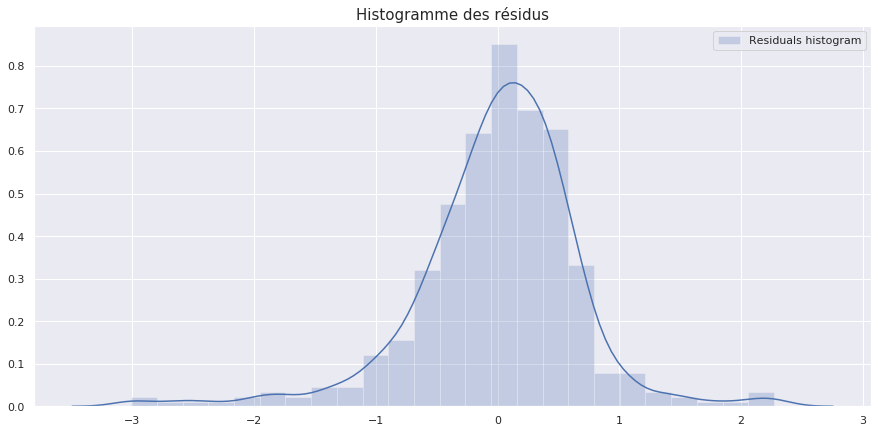

In [20]:
residuals = model.resid

plt.figure(figsize=(15, 7))
plt.title("Histogramme des résidus", fontsize=15)
sns.distplot(residuals, bins=25, label='Residuals histogram', hist_kws=dict(alpha=0.25))

plt.legend()
plt.show()

### Commentaire:

L'histogramme ci-dessus montre que la distribution des résidus a tendance à suivre une loi normale. La statistique skeweness associée étant relativement proche de 0, on peut conclure que la distribution des résidus est quasi symétrique (Cf. tableau des résultats).


## <span style='color:rgb(102, 51, 0)'>  8. Tester l'hypothèse de non significativité de nwifeinc avec un seuil de significativité de 1%, 5% et 10% (test alternatif des deux côtés). Commentez les p-values. </span>

En considérant le coefficient associé nwifeinc comme $\Large \beta_{nwifeinc}$, les hypothèses à tester sont:

$\Large H_0 : \beta_{nwifeinc} = 0 $

$\Large H_1 : \beta_{nwifeinc} ≠ 0 $

La statistique du test est donnée par:

$\Large t_{nwifeinc} = \frac {|\hat{\beta}_{nwifeinc} - \beta_{nwifeinc}|} {\hat{\sigma}_{nwifeinc}} $

Sous l'hypothèse nulle $\Large H_0 $, la statistique de test devient:

$\Large t_{nwifeinc} = \frac {|\hat{\beta}_{nwifeinc}|} {\hat{\sigma}_{nwifeinc}} $

Puis l'on compare cette statistique de test à une valeur critique $\Large {t_{n-k}}^{\alpha \%} $, $\large k$ étant le nombre de coefficients à estimer et $\large n$ le nombre de variables ou d'observations du modèle, $ \large \alpha $ étant le seuil de significativité.

Si la statistique de test est supérieure à la valeur critique, on rejette $\Large H_0 $.

### Test de significativité de student à 1%, 5% et 10%

In [21]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  lwage   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     12.92
Date:                Sun, 12 Apr 2020   Prob (F-statistic):           2.00e-13
Time:                        21:35:45   Log-Likelihood:                -431.92
No. Observations:                 428   AIC:                             877.8
Df Residuals:                     421   BIC:                             906.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3990      0.207     -1.927      0.0

Ce tableau de résultat fournit la p-value de la variable "nwifeinc". Celle ci correspond à la valeur 0.143 qui se trouve supérieur à 1%, 5% et 10%. On conclut que cette variable n'est pas significtive pour ces seuils.

## <span style='color:rgb(102, 51, 0)'>  9- Tester l’hypothèse que le coefficient associé à nwifeinc est égal à 0.01 avec un seuil de significativité de 5% (test à alternatif des deux côtés) </span>

### Coefficients estimés

In [22]:
print(model.params, model.bse)

const      -0.398975
city        0.035268
educ        0.102248
exper       0.015488
nwifeinc    0.004883
kidslt6    -0.045303
kidsge6    -0.011704
dtype: float64 const       0.207050
city        0.070178
educ        0.015102
exper       0.004487
nwifeinc    0.003331
kidslt6     0.085308
kidsge6     0.026944
dtype: float64


## Test

$\Large H_0 : \beta_{nwifeinc} = 0.01 $

$\Large H_1 : \beta_{nwifeinc} ≠ 0.01 $

La statistique du test est donnée par:

$\Large t_{nwifeinc} = \frac {|\hat{\beta}_{nwifeinc} - \beta_{nwifeinc}|} {\hat{\sigma}_{nwifeinc}} $ car $ \Large variance(\hat{\beta}_{nwifeinc} - 0.01) = var (\hat{\beta}_{nwifeinc})$ 

Sous l'hypothèse nulle $\Large H_0 $, la statistique de test devient:

$\Large t_{nwifeinc} = \frac {|\hat{\beta}_{nwifeinc} - 0.01|} {\hat{\sigma}_{nwifeinc}} = t_{cal}$

En application numérique:

$\Large t_{nwifeinc} = \frac {|0.004883 - 0.01|} {0.003331}= t_{cal}= 1.5361 $ 

$\Large {t_{428-7}}^{5\%} = t_{lu}$

### Seuil de significativité généralement appeleé t_lu

In [23]:
t_lu = t.ppf(0.975,df=421)
t_lu

1.965614792008086

## Commentaire:

 La statistique $ \large t_{cal}$ de student est inferieure à la statistique observée au seuil de significativité de 5% ($\large t_{lu}$). On ne peut donc pas rejeter l'hypothèse nulle $\large H_0$.
 
Ceci voudrait dire que la différence $\large (\beta_{nwifeinc} - 0.01)$ n'est pas statistiquement significative. Le coefficient $\large \beta_{nwifeinc}$ n'est pas statistiquement différent de $\large 0.01$.

## <span style='color:rgb(102, 51, 0)'>  10. Tester l’hypothèse jointe que le coefficient de nwifeinc est égal à 0.01 et que celui de city est égal à 0.05 </span>

### Le modèle non contraint:

$ \large y = \beta_{0}  + \beta_{1} city + \beta_{2} educ + \beta_{3} exper + \beta_{4} nwifeinc + \beta_{5} kidslt6 + \beta_{6} kidsge6$

### Le modèle contraint:

$ \large y = \beta_{0}  +  0.05 city + \beta_{2} educ + \beta_{3} exper +  0.01 nwifeinc + \beta_{5} kidslt6 + \beta_{6} kidsge6$

ce qui équivaut à:


$ \large (y - 0.05 city - 0.01 nwifeinc) = \beta_{0}  + \beta_{2} educ + \beta_{3} exper + \beta_{5} kidslt6 + \beta_{6} kidsge6$

## Test:

$\large H_0 : \beta_{nwifeinc} = 0.01, \beta_{city} = 0.05 $

### Modèle non contraint

In [24]:
X = data1[cols]
Y = data1.lwage

model1=sm.OLS(Y, sm.add_constant(X))
results = model1.fit()
print(results.summary())
u=results.resid
SSR0=u.T@u
print(SSR0)

                            OLS Regression Results                            
Dep. Variable:                  lwage   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     12.92
Date:                Sun, 12 Apr 2020   Prob (F-statistic):           2.00e-13
Time:                        21:35:49   Log-Likelihood:                -431.92
No. Observations:                 428   AIC:                             877.8
Df Residuals:                     421   BIC:                             906.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3990      0.207     -1.927      0.0

### Modèle contraint

In [25]:
cols_c = ['educ', 'exper', 'kidslt6', 'kidsge6']
Xc = data1[cols_c]
Yc = data1.lwage - 0.05*data1.city - 0.01*data1.nwifeinc

model2 = sm.OLS(Yc, sm.add_constant(Xc))
results = model2.fit()
print(results.summary())
uc = results.resid
SSR1 = uc.T@uc
print(SSR1)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.130
Model:                            OLS   Adj. R-squared:                  0.122
Method:                 Least Squares   F-statistic:                     15.84
Date:                Sun, 12 Apr 2020   Prob (F-statistic):           4.34e-12
Time:                        21:35:50   Log-Likelihood:                -433.28
No. Observations:                 428   AIC:                             876.6
Df Residuals:                     423   BIC:                             896.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4287      0.206     -2.082      0.0

In [26]:
n = 428
k = 7
F=((SSR1-SSR0)/2)/(SSR0/(n-k))
print('La statistique du test de Fisher joint est:{}'.format(F))
pval = f.sf(F,2,n-k)
print('La p valeur associée à cette statistique est:{}'.format(pval))

La statistique du test de Fisher joint est:1.3370704454928417
La p valeur associée à cette statistique est:0.2637267136252716


### Commentaire:

La p value étant élevée par rapport au seuil de 5%, on ne rejette pas l'hypothèse $\large H_0$. Par conséquent, les coefficients $\large \beta_{nwifeinc}$ et $ \large \beta_{city}$ ne sont pas conjointement et statistiquement différents des valeurs respectives de 0.01 et 0.05  

## <span style='color:rgb(102, 51, 0)'>  11. Tester l’hypothèse jointe que  𝛽nwifeinc +𝛽city = 0.1   et    𝛽 educ +𝛽 exper = 0.1 </span>

## Test:

$\large H_0 : \beta_{4} + \beta_{1} = 0.1, \beta_{2} + \beta_{3} = 0.1 $

### Le modèle non contraint:

$ \large y = \beta_{0}  + \beta_{1} city + \beta_{2} educ + \beta_{3} exper + \beta_{4} nwifeinc + \beta_{5} kidslt6 + \beta_{6} kidsge6$

### Le modèle contraint:

$ \large y = \beta_{0}  +  (0.1 - \beta_{4})  city + \beta_{2} educ + (0.1 - \beta_{2}) exper +  \beta_{4} nwifeinc + \beta_{5} kidslt6 + \beta_{6} kidsge6$

Après substitution on obtient:

$ \large (y - 0.1 city - 0.1 exper) = \beta_{0} - \beta_{4} city + \beta_{2} educ - \beta_{2} exper + \beta_{4} nwifeinc + \beta_{5} kidslt6 + \beta_{6} kidsge6 $

Après arrangement on a:

$ \large (y - 0.1 city - 0.1 exper) = \beta_{0} + \beta_{4} (nwifeinc - city) + \beta_{2} (educ - exper) +  \beta_{5} kidslt6 + \beta_{6} kidsge6 $

### Estimation du modèle contraint

In [27]:
# Nous allons créer deux nouvelles colonnes new_col1 et new_col2 correspondant aux variables en différence
data1['new_col1'] = data1.nwifeinc - data1.city
data1['new_col2'] = data1.educ - data1.exper

In [28]:
# Nous estimons le modèle en prenant en compte les changements de variables effectués
cols = ['new_col1', 'new_col2', 'kidslt6', 'kidsge6']
X = data1[cols]
Y = data1.lwage - 0.1*data1.city - 0.1*data1.exper

model = sm.OLS(Y, sm.add_constant(X))
results = model.fit()
print(results.summary())
u = results.resid
SSRc = u.T@u
print(SSRc)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.543
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     125.9
Date:                Sun, 12 Apr 2020   Prob (F-statistic):           1.11e-70
Time:                        21:35:52   Log-Likelihood:                -432.86
No. Observations:                 428   AIC:                             875.7
Df Residuals:                     423   BIC:                             896.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2133      0.079     -2.700      0.0

In [29]:
n = 428
k = 7
F=((SSRc-SSR0)/2)/(SSR0/(n-k))
print('La statistique du test de Fisher joint est:{}'.format(F))
pval = f.sf(F,2,n-k)
print('La p valeur associée à cette statistique est:{}'.format(pval))

La statistique du test de Fisher joint est:0.9227079781812212
La p valeur associée à cette statistique est:0.3982435347480656


### Commentaire: 

On ne peut rejeter l'hypothèse nulle dans ce cas de figure. On conclut que les sommes respectives  $\large \beta_{4} + \beta_{1} $ et  $\large \beta_{2} + \beta_{3}$ ne sont pas conjointement et statistiquement différentes de 0.1.

## <span style='color:rgb(102, 51, 0)'>  12. Faites une représentation graphique de la manière dont le salaire augmente avec l’éducation et l’expérience professionnelle. Commentez </span>

In [30]:
data1[['educ', 'exper', 'wage']]

,educ,exper,wage
0,12,14,3.3540
1,12,5,1.3889
2,12,15,4.5455
3,12,6,1.0965
4,14,7,4.5918
...,...,...,...
423,10,2,2.3118
424,12,21,5.3061
425,13,22,5.8675
426,12,14,3.4091


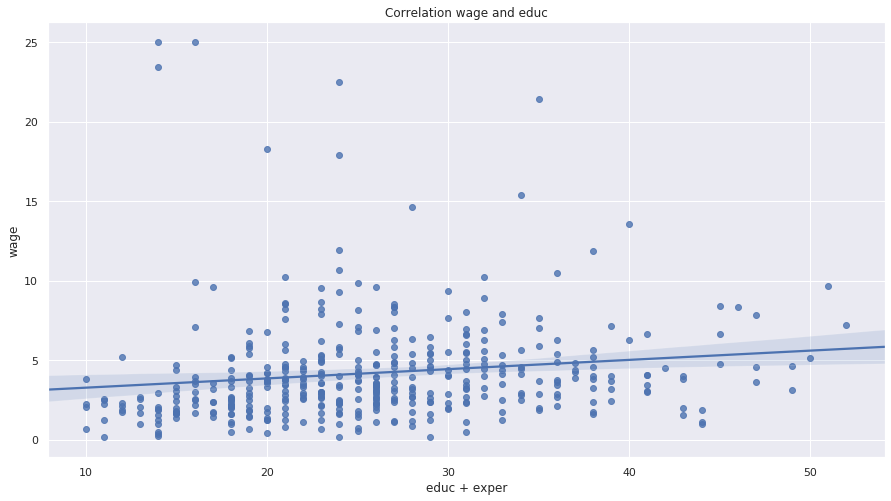

In [31]:
plt.figure(figsize=(15,8))
#plt.scatter(data1.educ, data1.wage)
sns.regplot(data1.educ + data1.exper, data1.wage, scatter=True)
plt.title('Correlation wage and educ')
plt.xlabel('educ + exper')
plt.ylabel('wage')
plt.show()

### Commentaire:
  
    Ce graphique montre comment le salaire évolue linéairement avec l'éducation et l'expérience. On peut remarquer que cette évolution n'est pas aussi forte car la pente réprésentant celle ci est faible. Mais il est certain qu'il s'agit bien d'une évolution positive. 

## <span style='color:rgb(102, 51, 0)'>  13. Tester l’égalité des coefficients associés aux variables kidsgt6 et kidslt6. Interprétez </span>

## Test:

$\large H_0 : \beta_{5} = \beta_{6} $

### Le modèle non contraint:

$ \large y = \beta_{0}  + \beta_{1} city + \beta_{2} educ + \beta_{3} exper + \beta_{4} nwifeinc + \beta_{5} kidslt6 + \beta_{6} kidsge6$

### Le modèle contraint:
$ \large y = \beta_{0}  + \beta_{1} city + \beta_{2} educ + \beta_{3} exper + \beta_{4} nwifeinc + \beta_{5} (kidslt6 + kidsge6)$

### Estimation du modèle contraint

In [32]:
# Nous allons créer une nouvelle colonne col_new 
data1['col_new'] = data1.kidslt6 + data1.kidsge6

In [33]:
# Nous estimons le modèle en prenant en compte les changements de variables effectués
cols = ['city', 'educ', 'exper', 'nwifeinc', 'col_new']
X = data1[cols]
Y = data1.lwage

In [34]:
model = sm.OLS(Y, sm.add_constant(X))
results = model.fit()
print(results.summary())
u = results.resid
SSRc1 = u.T@u
print(SSRc1)

                            OLS Regression Results                            
Dep. Variable:                  lwage   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.145
Method:                 Least Squares   F-statistic:                     15.51
Date:                Sun, 12 Apr 2020   Prob (F-statistic):           5.10e-14
Time:                        21:35:55   Log-Likelihood:                -431.99
No. Observations:                 428   AIC:                             876.0
Df Residuals:                     422   BIC:                             900.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3892      0.205     -1.897      0.0

In [35]:
n = 428
k = 7
F=((SSRc1-SSR0)/1)/(SSR0/(n-k))
print('La statistique du test de Fisher joint est:{}'.format(F))
pval = f.sf(F,1,n-k)
print('La p valeur associée à cette statistique est:{}'.format(pval))

La statistique du test de Fisher joint est:0.1381961138529024
La p valeur associée à cette statistique est:0.7102679748433033


### Commentaire:

On ne rejette pas l'hypothèse $\large H_0 : \beta_{5} = \beta_{6} $.

Le coefficient $\large \beta_{5}$ n'est donc pas statistiquement différent du coefficient $\large \beta_{6} $. 

## <span style='color:rgb(102, 51, 0)'>  14 - Faire le test d'hétéroscédasticité de forme linéaire en donnant la p-valeur. Déterminer la ou les sources d’hétéroscédasticité et corriger avec les méthodes vues en cours. Comparer les écarts-types des coefficients estimés avec ceux obtenus à la question 7. Commenter. </span>

## Observation graphique des résidus

In [36]:
cols = ['city', 'educ', 'exper', 'nwifeinc', 'kidslt6', 'kidsge6']
X = data1[cols]
Y = data1.lwage

model = sm.OLS(Y, sm.add_constant(X))
results = model.fit()
u = results.resid

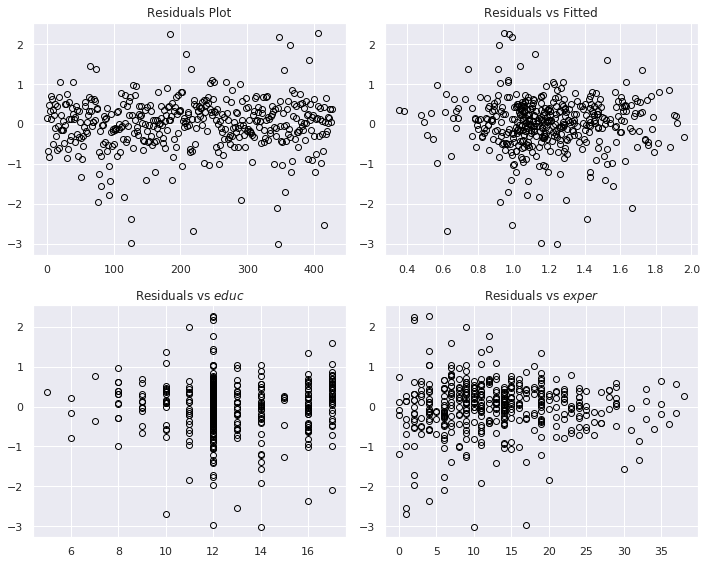

In [37]:
import matplotlib.pyplot as plt
fig = plt.figure(num = 0, figsize = (10, 8))
plot_opts = dict(linestyle = "None", marker = "o", color = "black", markerfacecolor = "None")
_ = fig.add_subplot(2, 2, 1).plot(model.fit().resid, **plot_opts)
_ = plt.title("Residuals Plot")
_ = fig.add_subplot(2, 2, 2).plot(model.fit().fittedvalues, model.fit().resid, **plot_opts)
_ = plt.title("Residuals vs Fitted")
_ = fig.add_subplot(2, 2, 3).plot(data1.educ, model.fit().resid, **plot_opts)
_ = plt.title("Residuals vs $educ$")
_ = fig.add_subplot(2, 2, 4).plot(data1.exper, model.fit().resid, **plot_opts)
_ = plt.title("Residuals vs $exper$")
_ = plt.tight_layout()
plt.show()

L'observation des figures ci-dessus montrent bien qu'il est possible qu'il y ait une faible hétéroscédasticité. La figure "residuals plot" par exemple montre que les résidus ont globalement des valeurs comprises entre -1 et 1. Juste quelques valeurs (outliers) sortent de cet intervalle de -1 et 1. La figure residuals vs educ montre une possible tendance explosive entre educ et les résidus.

## Détection de l'hétéroscédasticité à partir de la régression des résidus au carré sur les autres variables explicatives

## Procédure:

On récupère les résidus u issus de l'estimation de l'équation suivante:

$ \large y = \beta_{0}  + \beta_{1} city + \beta_{2} educ + \beta_{3} exper + \beta_{4} nwifeinc + \beta_{5} kidslt6 + \beta_{6} kidsge6$

On estime une nouvelle équation avec les résidus élevés au carré comme étant la variable expliquée

$ \large u² = \beta_{0}  + \beta_{1} city + \beta_{2} educ + \beta_{3} exper + \beta_{4} nwifeinc + \beta_{5} kidslt6 + \beta_{6} kidsge6$


## Test

$\large H_0 : \beta_{1} = \beta_{2} = \beta_{3} = \beta_{4} = \beta_{5} = \beta_{6} = 0$ (Homoscédasticité)


In [38]:
cols = ['city', 'educ', 'exper', 'nwifeinc', 'kidslt6', 'kidsge6']
X = data1[cols]
Y = data1.lwage

model = sm.OLS(Y, sm.add_constant(X))
results = model.fit()
u = results.resid
y = u**2

model_ = sm.OLS(y, sm.add_constant(X))
results_ = model_.fit()
print(results_.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     2.009
Date:                Sun, 12 Apr 2020   Prob (F-statistic):             0.0633
Time:                        21:35:58   Log-Likelihood:                -622.39
No. Observations:                 428   AIC:                             1259.
Df Residuals:                     421   BIC:                             1287.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4519      0.323      1.398      0.1

La statisque F est de 2.009 et la p valeur associée est 0.0633. 

Cette p valeur est supérieure au seuil critique 0.05. On ne rejette pas l'hypothèse $\large H_0$. Donc il y a homoscédasticité.

Mais d'après l'analyse graphique, la variable educ esquisse une tendance explosive avec le residu. Nous allons la transformer en log, corriger les écarts types selon la méthode vue en cours et refaire le test d'homoscédasticité.

### Transformation de la variable educ en log, pondérations et correction d'écart type

In [39]:
data1['leduc'] = np.log(data1.educ)
cols = ['city', 'leduc', 'exper','nwifeinc', 'kidslt6', 'kidsge6']
X = data1[cols]
Y = data1.lwage

h=np.sqrt(data1.leduc)
model = sm.WLS(Y, sm.add_constant(X),weight=1/h)
results = model.fit()
u = results.resid
y = u**2

model_ = sm.OLS(y, sm.add_constant(X))
results_ = model_.fit()

print(results.summary())
print(results_.summary())

                            WLS Regression Results                            
Dep. Variable:                  lwage   R-squared:                       0.147
Model:                            WLS   Adj. R-squared:                  0.135
Method:                 Least Squares   F-statistic:                     12.08
Date:                Sun, 12 Apr 2020   Prob (F-statistic):           1.55e-12
Time:                        21:35:59   Log-Likelihood:                -434.12
No. Observations:                 428   AIC:                             882.2
Df Residuals:                     421   BIC:                             910.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.0651      0.456     -4.527      0.0

Les écarts type ont bien changé dans les résultats du tableau 1

Dans les résultats du 1er tableau, la statistique de Fisher F est de 12.08 et la p valeur associée est de 1.55e-12. Ceci signifie que les coefficients sont globalement siginificatif.  Autrement dit, on rejette l'hypothèse H0 que tous les coefficients estimés sont statistiquement et conjointement nuls. Il y a donc bien des coefficients qui sont significatifs.

Dans les résultats du 2nd tableau où on estime le terme d'erreur u élevé au carré sur les autres variables explicatives, la statisque F est de 2.073 et la p valeur associée est 0.0552. Cette p valeur est supérieure au seuil critique 0.05. Donc on ne rejette pas l'hypothèse HO. il y a homoscedasticité. Globalement, tous les coefficients sont nuls c'est à dire qu'ils n'expliquent pas les résidus élevés au carré. On est donc dans un cas de figure d'absence d'hétéroscédasticité.

Notons que notre méthode a augmenté l'hétéroscédasticité par rapport au modèle précedement estimé car la p valeur s'est améliorée.

## Nouvelle observation graphique

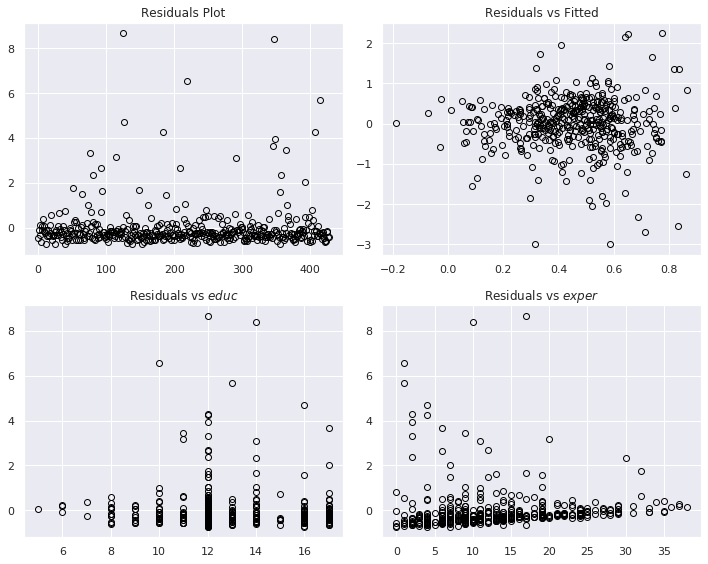

In [40]:
import matplotlib.pyplot as plt
fig = plt.figure(num = 0, figsize = (10, 8))
plot_opts = dict(linestyle = "None", marker = "o", color = "black", markerfacecolor = "None")
_ = fig.add_subplot(2, 2, 1).plot(model_.fit().resid, **plot_opts)
_ = plt.title("Residuals Plot")
_ = fig.add_subplot(2, 2, 2).plot(model_.fit().fittedvalues, model.fit().resid, **plot_opts)
_ = plt.title("Residuals vs Fitted")
_ = fig.add_subplot(2, 2, 3).plot(data1.educ, model_.fit().resid, **plot_opts)
_ = plt.title("Residuals vs $educ$")
_ = fig.add_subplot(2, 2, 4).plot(data1.exper, model_.fit().resid, **plot_opts)
_ = plt.title("Residuals vs $exper$")
_ = plt.tight_layout()
plt.show()

## Commentaire:

L'observation de la figure "Residuals plot" montre qu'il y a une tendance plus prononcée des valeurs de résidus autour de la valeur zéro. La figure residuals vs educ montre que la tendance explosive de la relation educ et residu s'est reduite considérablement autour de la valeur zéro. 


## <span style='color:rgb(102, 51, 0)'>  15. Tester le changement de structure de la question 8 entre les femmes qui ont plus de 43 ans et les autres : test sur l'ensemble des coefficients. Donnez les p-valeurs </span>

### Modèle général

In [41]:
cols = ['city', 'educ', 'exper', 'nwifeinc', 'kidslt6', 'kidsge6']
X = data1[cols]
Y = data1.lwage
model = sm.OLS(Y, sm.add_constant(X))
results = model.fit()
SCR_G = ((results.resid)**2).sum()

print(results.summary())
print(SCR_G)

                            OLS Regression Results                            
Dep. Variable:                  lwage   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     12.92
Date:                Sun, 12 Apr 2020   Prob (F-statistic):           2.00e-13
Time:                        21:36:01   Log-Likelihood:                -431.92
No. Observations:                 428   AIC:                             877.8
Df Residuals:                     421   BIC:                             906.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3990      0.207     -1.927      0.0

### Modèle1 partiel (modele_high_43)

In [42]:
data_high_43 = data1[data1.age > 43] 
data_high_43.reset_index()

cols = ['city', 'educ', 'exper', 'nwifeinc', 'kidslt6', 'kidsge6']
X = data_high_43[cols]
Y = data_high_43.lwage
model = sm.OLS(Y, sm.add_constant(X))

results = model.fit()
SCR_high43 = ((results.resid)**2).sum()

print(results.summary())
print(SCR_high43)

                            OLS Regression Results                            
Dep. Variable:                  lwage   R-squared:                       0.166
Model:                            OLS   Adj. R-squared:                  0.138
Method:                 Least Squares   F-statistic:                     5.925
Date:                Sun, 12 Apr 2020   Prob (F-statistic):           1.15e-05
Time:                        21:36:02   Log-Likelihood:                -179.89
No. Observations:                 186   AIC:                             373.8
Df Residuals:                     179   BIC:                             396.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3232      0.276     -1.173      0.2

### Modèle2 partiel (modele_inf_43)

In [43]:
data_inf_43 = data1[data1.age <= 43] 
data_inf_43.reset_index()

cols = ['city', 'educ', 'exper', 'nwifeinc', 'kidslt6', 'kidsge6']
X = data_inf_43[cols]
Y = data_inf_43.lwage
model = sm.OLS(Y, sm.add_constant(X))

results = model.fit()
SCR_inf43 = ((results.resid)**2).sum()

print(results.summary())
print(SCR_inf43)

                            OLS Regression Results                            
Dep. Variable:                  lwage   R-squared:                       0.168
Model:                            OLS   Adj. R-squared:                  0.146
Method:                 Least Squares   F-statistic:                     7.888
Date:                Sun, 12 Apr 2020   Prob (F-statistic):           9.37e-08
Time:                        21:36:02   Log-Likelihood:                -248.69
No. Observations:                 242   AIC:                             511.4
Df Residuals:                     235   BIC:                             535.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5412      0.318     -1.702      0.0

### Test de CHOW

$\large H_0 :$ Pas de changements structurels importants

La statistique du test de Chow est donnée par:

CHOW_F_static :  $\Large \frac { \frac{SCR_{G} - (SCR_{high43} + SCR_{inf43})}{7} }{ \frac{(SCR_{high43} + SCR_{inf43})}{428 - 2*7} } $         

Application numérique: $\Large \frac { \frac{188.59 - (75.348 + 110.644)}{7} }{ \frac{75.348 + 110.644}{428 - 2*7} } = \frac{0.371}{0.45} = 0.826 $ 

In [44]:
F = 0.826
k = 7
n = 428
p = n-2*k
print('La p valeur associée à cette statistique est:.{}'.format(f.sf(F,k, p)))

La p valeur associée à cette statistique est:.0.5660673595906032


### Commentaire:
Cette p valeur est supérieure au seuil de significativité de 5%. On ne rejette pas l'hypothèse H0. On conclut qu'il n'y a pas de changements structurels entre les groupes de femmes de plus de 43 ans et les autres.

## <span style='color:rgb(102, 51, 0)'>  16. Ajouter au modèle de la question 7 la variable huseduc. Faire ensuite la même régression en décomposant la variable huseduc en 4 variables binaires construites selon votre choix. Faire le test de non significativité de l’ensemble des variables binaires. Donnez les p-valeurs et commentez. </span>

### Transformation de la variable huseduc en variables binaires

In [45]:
data1['dummy1'] = np.where(data1.huseduc < 7, 1, 0)
data1['dummy2'] = np.where(data1.huseduc.isin([7, 8, 9, 10]), 1, 0)
data1['dummy3'] = np.where(data1.huseduc.isin([11, 12, 13, 14]), 1, 0)
data1['dummy4'] = np.where(data1.huseduc.isin([15, 16, 17]), 1, 0)

### Estimation du modèle

In [46]:
cols = ['city', 'educ', 'exper', 'nwifeinc', 'kidslt6', 'kidsge6','huseduc', 'dummy1', 'dummy2', 'dummy3', 'dummy4']
X = data1[cols]
Y = data1.lwage
model = sm.OLS(Y, sm.add_constant(X))
results = model.fit()
print(results.summary())

u = results.resid
SSR = u.T@u
print(SSR)

                            OLS Regression Results                            
Dep. Variable:                  lwage   R-squared:                       0.161
Model:                            OLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                     8.018
Date:                Sun, 12 Apr 2020   Prob (F-statistic):           7.36e-12
Time:                        21:36:04   Log-Likelihood:                -430.47
No. Observations:                 428   AIC:                             882.9
Df Residuals:                     417   BIC:                             927.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2397      0.351     -0.684      0.4

### Test de non significativité de l’ensemble des variables binaires

### Modèle non contraint

$ \large y = \beta_{0}  + \beta_{1} city + \beta_{2} educ + \beta_{3} exper + \beta_{4} nwifeinc + \beta_{5} kidslt6 + \beta_{6} kidsge6 + \beta_{7} huseduc + \beta_{8} dummy1 + \beta_{9} dummy2 + \beta_{10} dummy3 + \beta_{11} dummy4$

### Modèle contraint

$ \large y = \beta_{0}  + \beta_{1} city + \beta_{2} educ + \beta_{3} exper + \beta_{4} nwifeinc + \beta_{5} kidslt6 + \beta_{6} kidsge6 + \beta_{7} huseduc $

### Test

$\large H_0 : \beta_{8} = \beta_{9} = \beta_{10} = \beta_{11} = 0$

### Estimation du modèle contraint

In [47]:
cols = ['city', 'educ', 'exper', 'nwifeinc', 'kidslt6', 'kidsge6','huseduc']
X = data1[cols]
Y = data1.lwage
modelc = sm.OLS(Y, sm.add_constant(X))
results = modelc.fit()
print(results.summary())

uc = results.resid
SSRc = uc.T@uc
print(SSRc)

                            OLS Regression Results                            
Dep. Variable:                  lwage   R-squared:                       0.159
Model:                            OLS   Adj. R-squared:                  0.145
Method:                 Least Squares   F-statistic:                     11.37
Date:                Sun, 12 Apr 2020   Prob (F-statistic):           3.14e-13
Time:                        21:36:07   Log-Likelihood:                -430.96
No. Observations:                 428   AIC:                             877.9
Df Residuals:                     420   BIC:                             910.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3494      0.210     -1.664      0.0

In [48]:
n = 428
k = 12
F=((SSRc-SSR)/4)/(SSR/(n-k))
print('La statistique du test de Fisher joint est:{}'.format(F))
pval = f.sf(F,4,n-k)
print('La p valeur associée à cette statistique est:{}'.format(pval))

La statistique du test de Fisher joint est:0.23859092428620082
La p valeur associée à cette statistique est:0.9164581525898713


La p valeur étant très élevée par rapport à 0.05, on ne rejette pas l'hypothèse H0

Les dummies introduites ne sont donc pas statistiquement et conjointement différentes de 0.